# BeerAdvocate

In [1]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
importlib.reload(utils)


<module 'utils' from 'c:\\Users\\jon\\Desktop\\EPFL\\MA1\\ADA\\pro_med\\ada-2024-project-mediterranean\\src\\data\\utils.py'>

## Files loading

In [2]:
beers_adv = pd.read_csv("../../data/Original/BeerAdvocate/beers.csv", sep=",")
breweries_adv = pd.read_csv("../../data/Original/BeerAdvocate/breweries.csv", sep=",")
users_adv = pd.read_csv("../../data/Original/BeerAdvocate/users.csv", sep=",")

# Data processing

### Beers

In [3]:
utils.dataset_information(beers_adv, "Beers_BA")



########################################################
We are starting analysing dataset Beers_BA
- Dimension of starting dataset: (280823, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id            brewery_name  \
0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_

Ensurance of correct data types:

In [4]:
utils.ensure_col_types(beers_adv,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_reviews', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [5]:
beers_adv.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


Keep only beers that have atleast one review and one rating. Only beers that have been tried are wanted

In [6]:
beers_adv_filt = beers_adv[(beers_adv['nbr_ratings'] != 0)].copy()

In [7]:
beers_adv_filt['nbr_ratings'].describe()

count    247982.000000
mean         33.845327
std         245.558727
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [8]:
beers_adv_filt['nbr_reviews'].describe()

count    247982.000000
mean         10.442637
std          73.197759
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        3899.000000
Name: nbr_reviews, dtype: float64

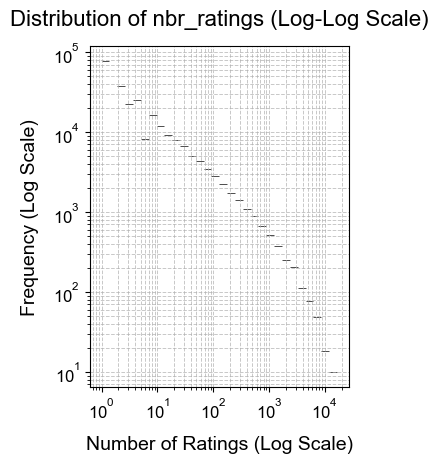

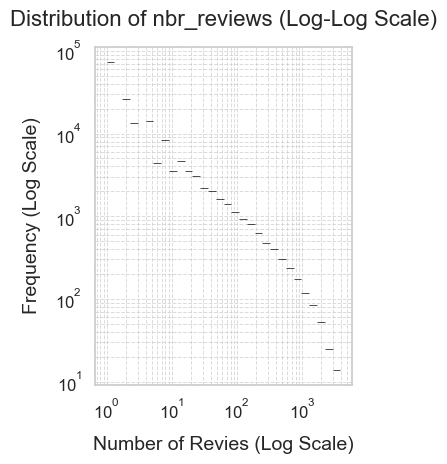

In [9]:
plt.subplot(121)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

plt.subplot(122)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Revies (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_reviews (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Duplicates dealing:

In [10]:
print(beers_adv_filt['beer_id'].duplicated().describe())

count     247982
unique         1
top        False
freq      247982
Name: beer_id, dtype: object


In [11]:
print(beers_adv_filt['beer_name'].duplicated().describe())
duplicated_beer_id_rows = beers_adv_filt[beers_adv_filt['beer_name'].duplicated(keep=False)]
duplicated_beer_id_rows.head(10)

count     247982
unique         2
top        False
freq      211159
Name: beer_name, dtype: object


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
34,7331,Stout,297,Thomas Caffrey Brewing Co.,American Stout,6,4,3.46,NaN,NaN,4.7,3.516667,NaN,0,NaN
35,178689,Boom,40360,Walled City Brewing Company,American Pale Ale (APA),1,0,3.95,NaN,NaN,4.2,3.950000,-0.064133,0,NaN
41,98728,300,3415,Whitewater Brewing Co,English Pale Ale,1,1,3.63,NaN,NaN,3.5,3.630000,NaN,0,NaN
45,53327,Belfast Black,3415,Whitewater Brewing Co,Irish Dry Stout,22,10,3.46,82.0,NaN,4.2,3.522727,NaN,0,NaN
46,38838,Belfast Lager,3415,Whitewater Brewing Co,Munich Helles Lager,17,11,3.60,83.0,NaN,4.5,3.632353,NaN,0,NaN
48,57236,Copperhead Ale,3415,Whitewater Brewing Co,English Pale Ale,5,4,3.52,NaN,NaN,3.7,3.524000,NaN,0,NaN
57,19322,Nut Brown,3415,Whitewater Brewing Co,English Brown Ale,1,1,4.10,NaN,NaN,4.0,4.100000,NaN,0,NaN
61,20788,White Gold,3415,Whitewater Brewing Co,English Pale Ale,1,1,3.77,NaN,NaN,4.1,3.770000,NaN,0,NaN
64,183236,Citra,40309,Ards Brewing Company,American Pale Ale (APA),1,0,3.32,NaN,NaN,5.0,3.320000,NaN,0,NaN
72,206037,'Tis The Saison,40307,Boundary Brewing Cooperative,Saison / Farmhouse Ale,1,0,3.27,NaN,NaN,5.0,3.270000,NaN,0,NaN


In [12]:
duplicates = beers_adv_filt[beers_adv_filt.duplicated(subset=['beer_name', 'brewery_name','style'], keep=False)]

print(duplicates.shape)
duplicates.head()

(876, 15)


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
6105,139099,Amber Ale,33363,Fourpure Brewing Co.,American Amber / Red Ale,5,1,3.54,NaN,NaN,5.1,3.530,NaN,0,NaN
6109,234173,Flatiron,33363,Fourpure Brewing Co.,American Amber / Red Ale,7,2,3.79,NaN,NaN,4.7,3.830,NaN,0,NaN
6123,165403,Amber Ale,37085,Fourpure Brewing Co.,American Amber / Red Ale,1,0,3.12,NaN,NaN,5.1,3.120,NaN,0,NaN
6124,233441,Flatiron,37085,Fourpure Brewing Co.,American Amber / Red Ale,4,2,3.78,NaN,NaN,4.7,4.005,NaN,0,NaN
7862,207341,10|05 Coffee Porter (San Sebastian),33192,Brew By Numbers,English Porter,1,0,4.05,NaN,NaN,6.5,4.050,NaN,0,NaN


In [13]:
merged_duplicates= duplicates.groupby(['beer_name', 'brewery_name','style']).agg({
    'beer_id': 'first',
    'brewery_id': 'first',
    'nbr_ratings': 'sum',
    'nbr_reviews': 'sum',
    'avg': 'mean',
    'ba_score': 'mean',
    'bros_score': 'mean',
    'abv': 'first',
    'avg_computed': 'mean',
    'zscore': 'mean',
    'nbr_matched_valid_ratings': 'sum',
    'avg_matched_valid_ratings': 'mean'               
}).reset_index()

print(merged_duplicates.shape)
merged_duplicates.head()


(382, 15)


,beer_name,brewery_name,style,beer_id,brewery_id,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,1 A.M. Ale,Emmett's Brewing Company,English Pale Ale,50282,5188,36,13,3.573333,84.0,NaN,4.5,3.519456,NaN,0,NaN
1,10|05 Coffee Porter (San Sebastian),Brew By Numbers,English Porter,207341,33192,2,0,4.090000,NaN,NaN,6.5,4.090000,NaN,0,NaN
2,11th Hour Pale Ale,Whitstran Brewing Company,American Pale Ale (APA),128366,19868,6,3,3.770000,NaN,NaN,5.6,3.661250,NaN,0,NaN
3,6 Foot 6,West O Beer,American IPA,231866,35371,10,6,3.400000,NaN,NaN,6.6,3.473750,NaN,0,NaN
4,71 Pale Ale,Ram Restaurant & Brewery,American Pale Ale (APA),289282,48037,53,10,3.804000,82.5,NaN,5.5,3.733589,NaN,0,NaN


In [14]:
beers_adv_filt = beers_adv_filt.drop(duplicates.index)
beers_adv_filt = pd.concat([beers_adv_filt, merged_duplicates], ignore_index=True)
beers_adv_filt.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,NaN,NaN,4.5,2.880000,NaN,0,NaN
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,4.5,3.845000,NaN,0,NaN
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,4.8,3.439867,-0.649167,59,3.504068
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,NaN,NaN,6.0,3.888750,0.093110,6,3.768333
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,4.2,3.556094,-0.478579,48,3.580417


Once seen that duplications are repeated entries they can be removed easily:

### Breweries

In [15]:
utils.dataset_information(breweries_adv, "Breweries_BA")



########################################################
We are starting analysing dataset Breweries_BA
- Dimension of starting dataset: (16758, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
       id    location                    name  nbr_beers
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
1  39913  Kyrgyzstan             Arpa (АРПА)          1
2  39914  Kyrgyzstan               Bear Beer          4
3  39915  Kyrgyzstan             Blonder Pub          4
4  39916  Kyrgyzstan            Kellers Bier          2


In [16]:
breweries_adv['nbr_beers'].describe()

count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64

Drop breweries with null `nbr_beers`:

In [ ]:
breweries_adv_filt = breweries_adv[(breweries_adv['nbr_beers'] != 0)].copy()
breweries_adv_filt.reset_index(drop=True, inplace=True)
breweries_adv_filt = breweries_adv_filt.drop(columns=['index'], errors='ignore')
breweries_adv_filt['nbr_beers'].describe()

count    14522.000000
mean        24.298444
std         74.041044
min          1.000000
25%          3.000000
50%          8.000000
75%         21.000000
max       1196.000000
Name: nbr_beers, dtype: float64

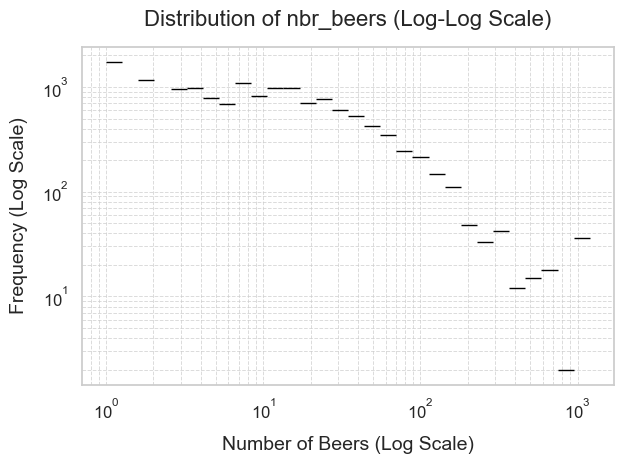

In [18]:
sns.set_theme(style="whitegrid")
sns.histplot(breweries_adv_filt['nbr_beers'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Beers (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_beers (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Location analysis:

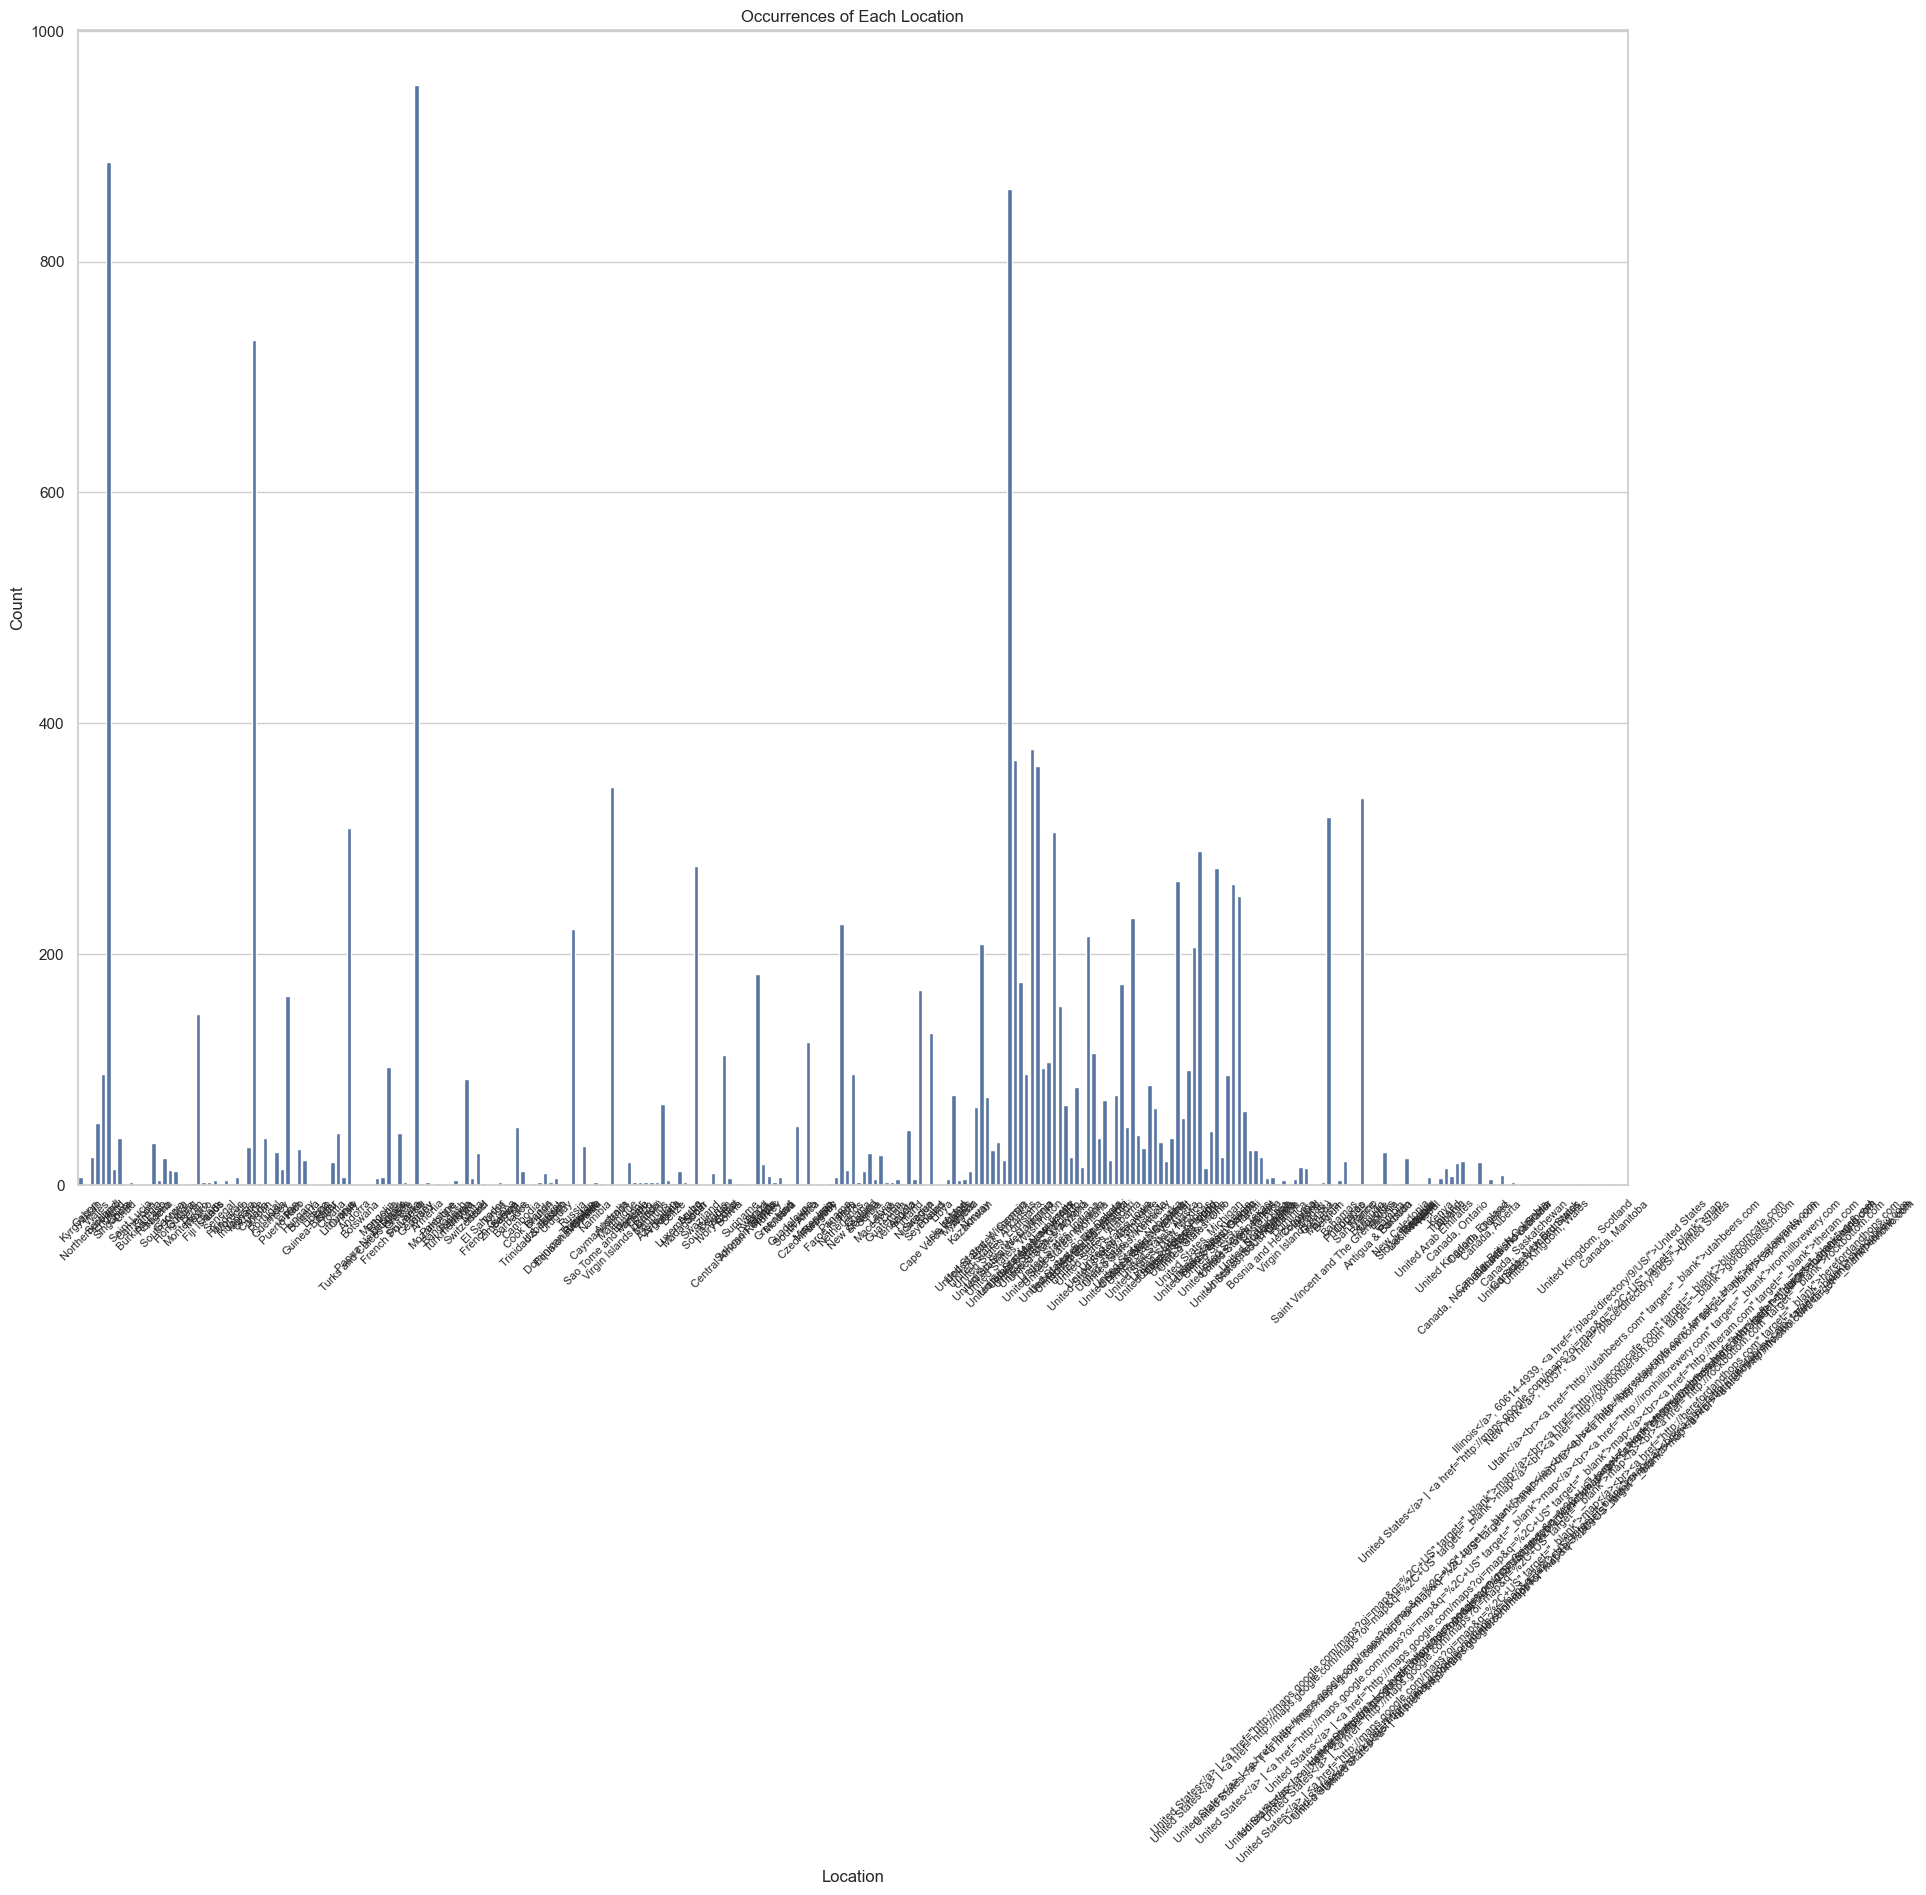

In [19]:
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Eliminate links added

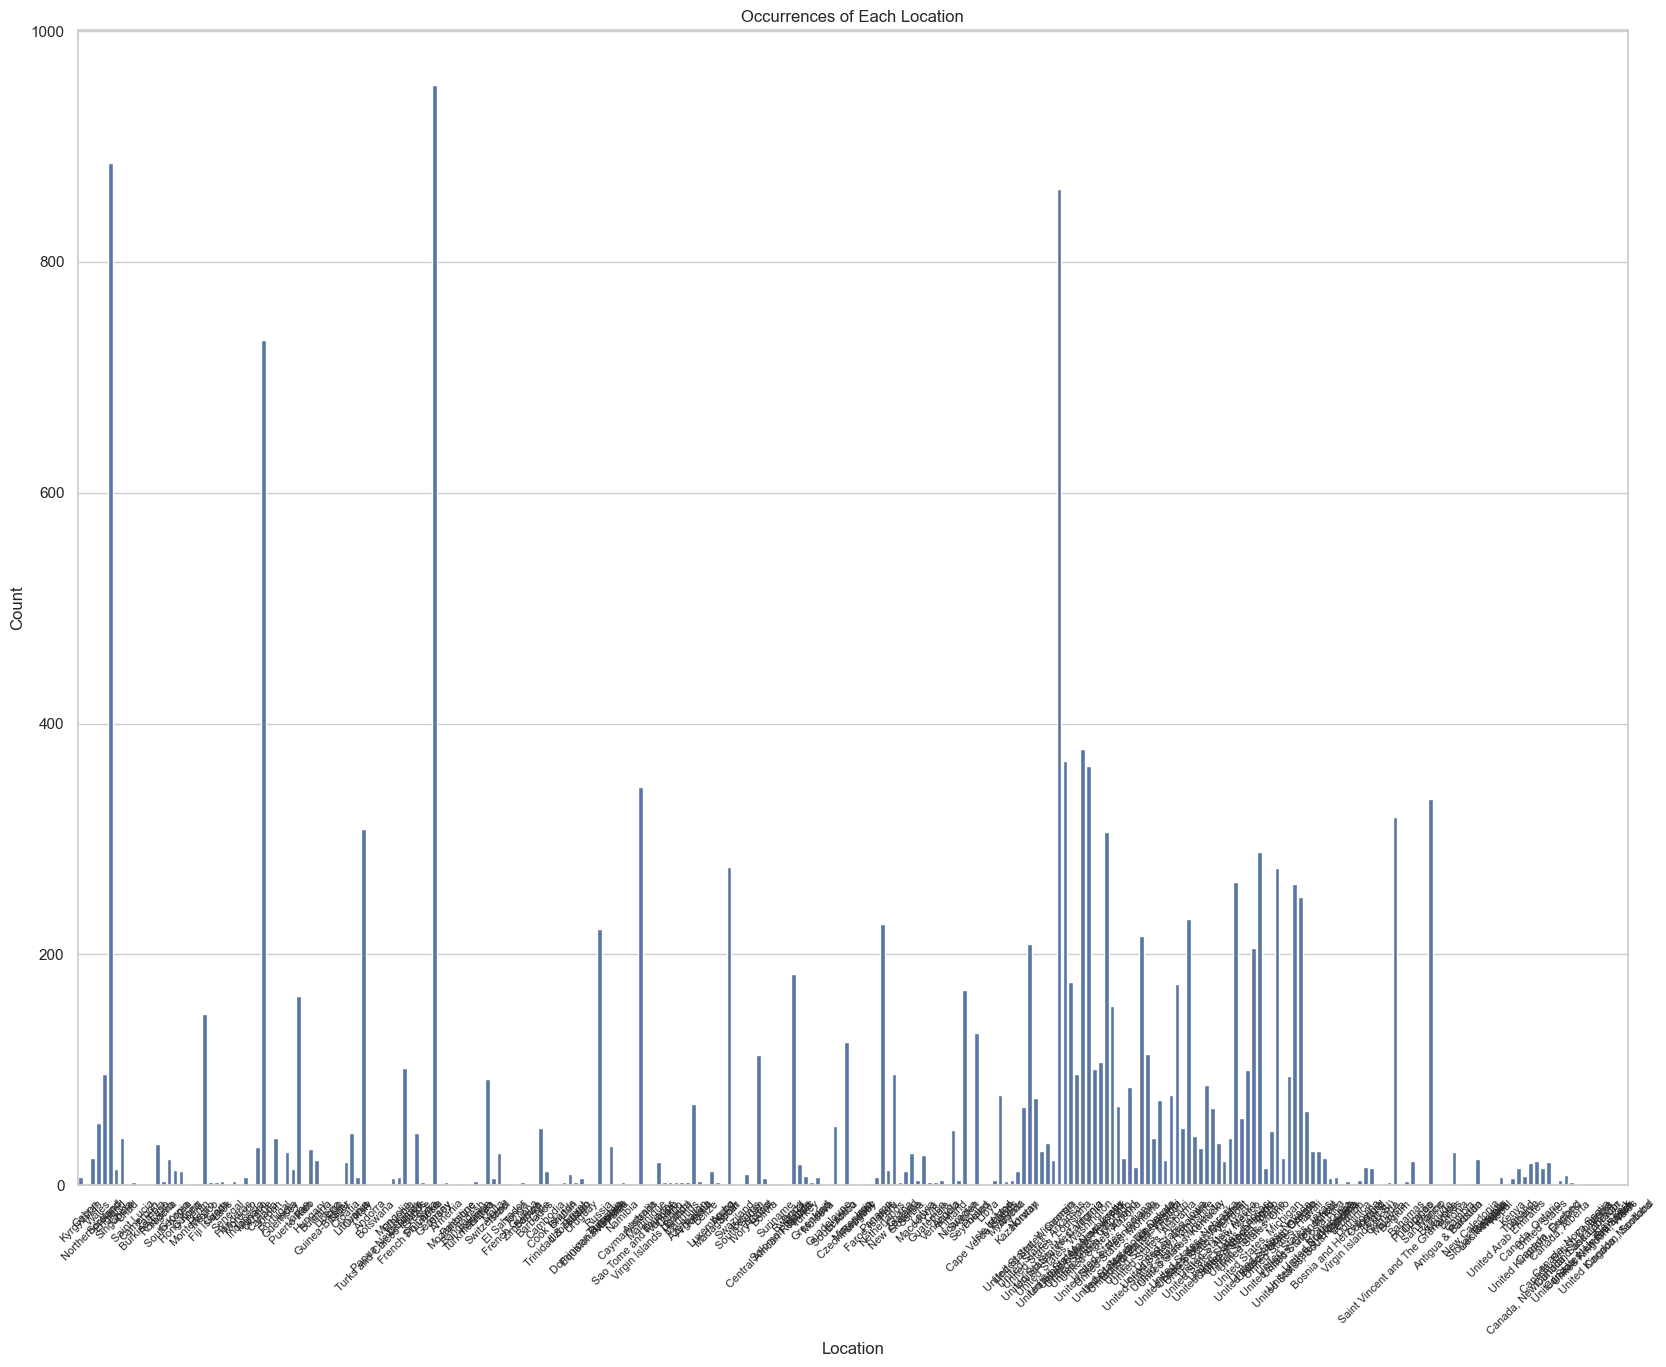

In [20]:
breweries_adv_filt['link'] = breweries_adv_filt['location'].str.contains("href", case=False, na=False)
breweries_adv_filt.loc[breweries_adv_filt['link'] == True, 'location'] = breweries_adv_filt['location'].str.split('<').str[0]
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Let's investigate location + region cases:

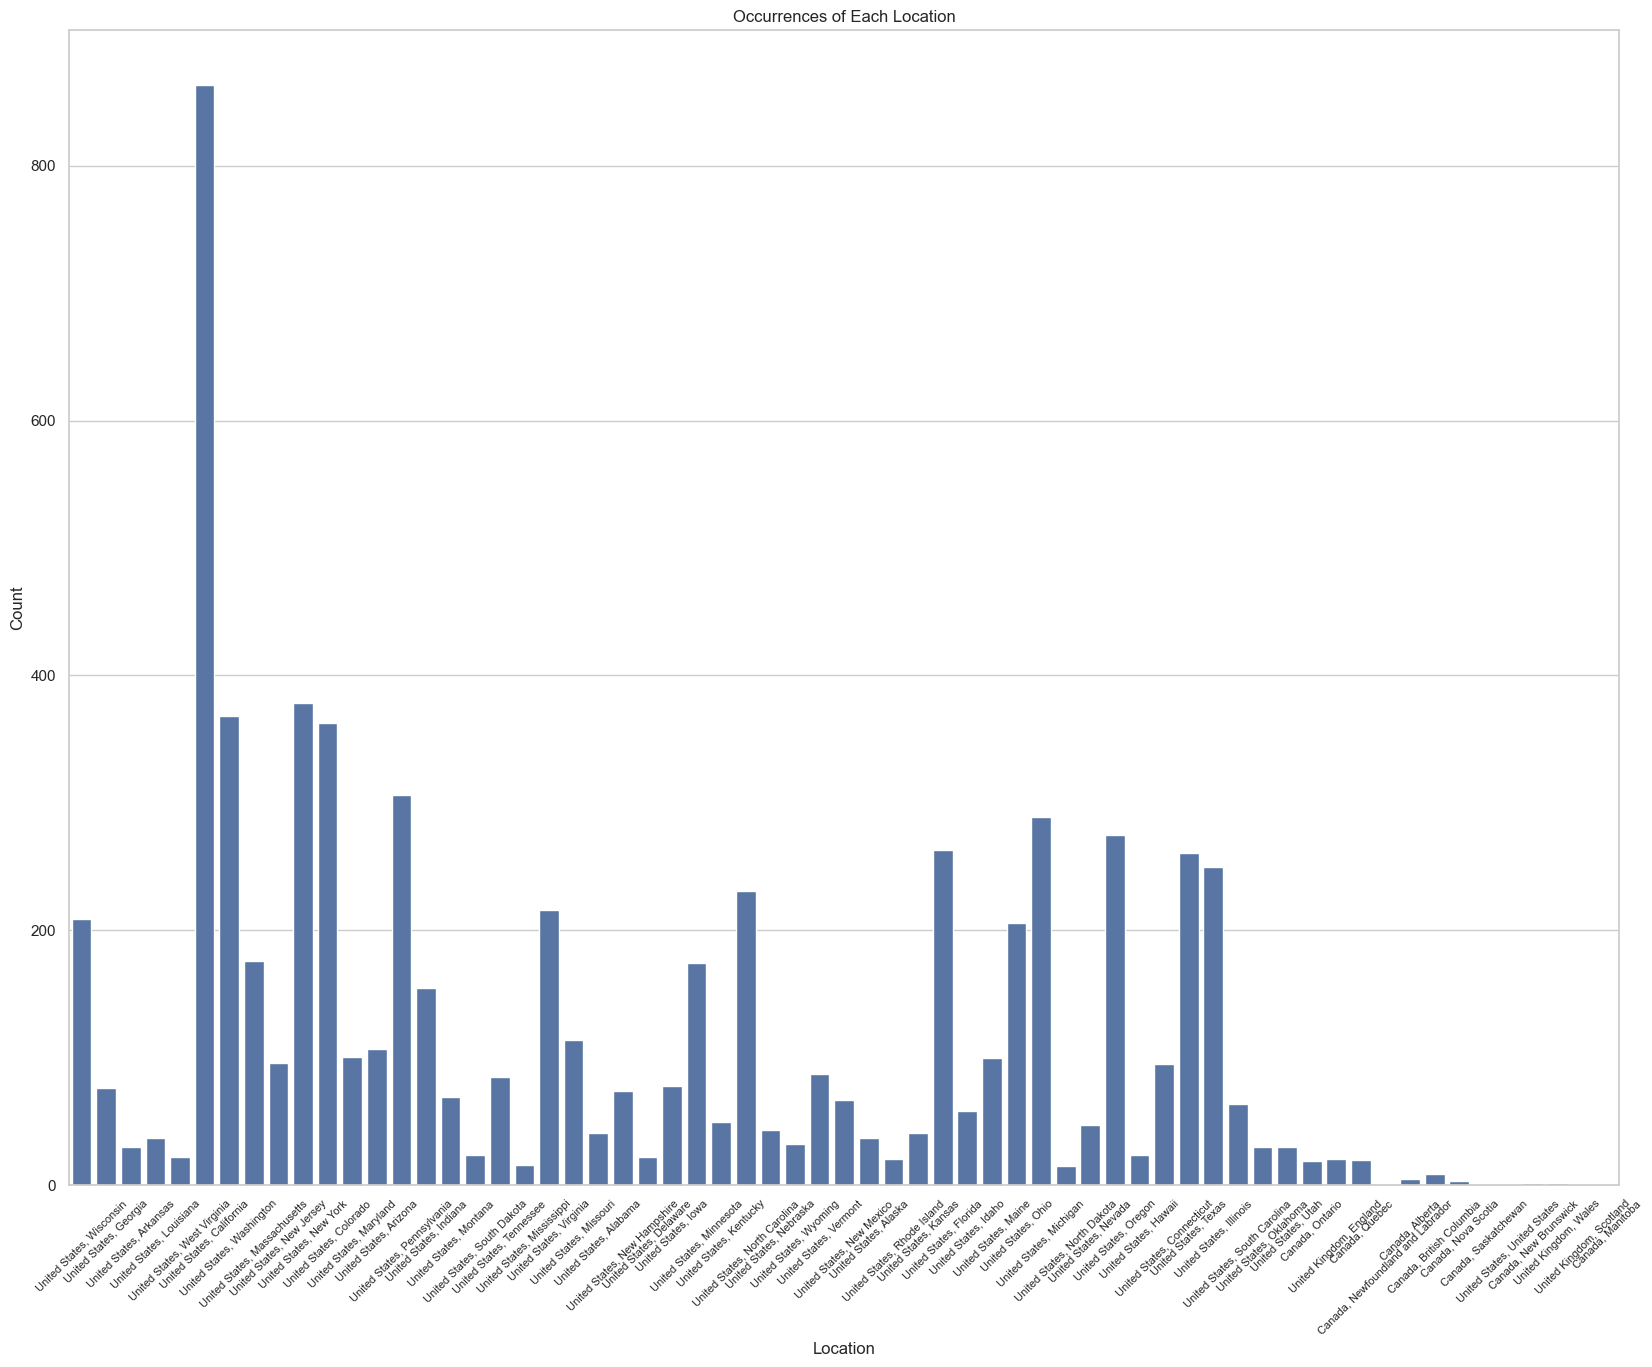

In [21]:
breweries_adv_filt['Regions'] = breweries_adv_filt['location'].str.contains(r"[,\|<]", case=False, na=False)

plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Regions'] == True], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

In [22]:
breweries_adv_filt[['location', 'location_region']] = breweries_adv_filt['location'].str.split(',', n=1, expand=True)
breweries_adv_filt['location'] = breweries_adv_filt['location'].str.strip()
breweries_adv_filt.reset_index(drop = True, inplace=False)
breweries_adv_filt = utils.update_location_and_region(breweries_adv_filt)
breweries_adv_filt['location_region'] = breweries_adv_filt['location_region'].str.strip()
breweries_adv_filt.head(20)

,id,location,name,nbr_beers,link,Regions,location_region
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,False,False,None
1,39913,Kyrgyzstan,Arpa (АРПА),1,False,False,None
2,39914,Kyrgyzstan,Bear Beer,4,False,False,None
3,39915,Kyrgyzstan,Blonder Pub,4,False,False,None
4,39916,Kyrgyzstan,Kellers Bier,2,False,False,None
5,16052,Kyrgyzstan,Steinbrau Pub,4,False,False,None
6,39917,Kyrgyzstan,Usu-Salkin Pivo,3,False,False,None
7,37262,Gabon,Societe des Brasseries du Gabon (SOBRAGA),1,False,False,None
8,10093,United Kingdom,Strangford Lough Brewing Company Ltd,5,False,False,Northern Ireland
9,32848,United Kingdom,The Sheelin Brewery,4,False,False,Northern Ireland


In [23]:
breweries_adv_filt['US'] = breweries_adv_filt['location'].str.contains("United States", case=False, na=False)
breweries_adv_filt['UK'] = breweries_adv_filt['location'].str.contains("United Kingdom", case=False, na=False)
breweries_adv_filt['Canada'] = breweries_adv_filt['location'].str.contains("Canada", case=False, na=False)

breweries_adv_filt.loc[breweries_adv_filt['location_region'] == "United States", 'location_region'] = np.nan

breweries_adv_filt = breweries_adv_filt.drop(columns=['Regions'], errors='ignore')

breweries_adv_filt.head()

,id,location,name,nbr_beers,link,location_region,US,UK,Canada
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,False,None,False,False,False
1,39913,Kyrgyzstan,Arpa (АРПА),1,False,None,False,False,False
2,39914,Kyrgyzstan,Bear Beer,4,False,None,False,False,False
3,39915,Kyrgyzstan,Blonder Pub,4,False,None,False,False,False
4,39916,Kyrgyzstan,Kellers Bier,2,False,None,False,False,False


Let's check for duplicates:

In [24]:
print(breweries_adv_filt['id'].duplicated().describe())

count     14522
unique        1
top       False
freq      14522
Name: id, dtype: object


In [25]:
breweries_adv_filt = breweries_adv_filt.drop(columns=['link'], errors='ignore')
breweries_adv_filt.head()

,id,location,name,nbr_beers,location_region,US,UK,Canada
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,None,False,False,False
1,39913,Kyrgyzstan,Arpa (АРПА),1,None,False,False,False
2,39914,Kyrgyzstan,Bear Beer,4,None,False,False,False
3,39915,Kyrgyzstan,Blonder Pub,4,None,False,False,False
4,39916,Kyrgyzstan,Kellers Bier,2,None,False,False,False


In [26]:
breweries_adv_filt[breweries_adv_filt['US']]

,id,location,name,nbr_beers,location_region,US,UK,Canada
6613,49595,United States,Copper State Brewing Company,7,Wisconsin,True,False,False
6614,5522,United States,Corner Pub,13,Wisconsin,True,False,False
6615,4834,United States,"Courthouse Pub, The",13,Wisconsin,True,False,False
6616,939,United States,Cross Plains Beer Company,3,Wisconsin,True,False,False
6617,21405,United States,Dave's BrewFarm,90,Wisconsin,True,False,False
...,...,...,...,...,...,...,...,...
14516,10673,United States,Warbird Brewing Company,6,Indiana,True,False,False
14517,16233,United States,Farmhouse Brewing Co.,4,California,True,False,False
14518,1613,United States,Panama City Brewery & Cafe,5,Florida,True,False,False
14520,1573,United States,John Harvard’s Brewery & Ale House,491,New York,True,False,False


Now we can merge the location column information to the beers dataset already processed:

In [27]:
breweries_adv_filt.rename(columns={'id': 'brewery_id'}, inplace=True)
breweries_adv_filt.rename(columns={'name': 'brewery_name'}, inplace=True)


beers_adv_filt_unique_location = beers_adv_filt.merge(
    breweries_adv_filt[['brewery_id','brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_id',
    how='left'
)

beers_adv_filt_unique_location.rename(columns={'brewery_name_x': 'brewery_name'}, inplace=True)

beers_adv_filt_unique_location = beers_adv_filt_unique_location.drop(columns=['brewery_name_y'], errors='ignore')
beers_adv_filt_unique_location.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,location_region,US,UK,Canada
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,NaN,NaN,4.5,2.880000,NaN,0,NaN,Gabon,None,False,False,False
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,4.5,3.845000,NaN,0,NaN,United Kingdom,Northern Ireland,False,True,False
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,4.8,3.439867,-0.649167,59,3.504068,United Kingdom,Northern Ireland,False,True,False
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,NaN,NaN,6.0,3.888750,0.093110,6,3.768333,United Kingdom,Northern Ireland,False,True,False
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,4.2,3.556094,-0.478579,48,3.580417,United Kingdom,Northern Ireland,False,True,False


### Users

In [28]:
utils.dataset_information(users_adv, "Users_BA")



########################################################
We are starting analysing dataset Users_BA
- Dimension of starting dataset: (153704, 6)
- Columns of dataset:  Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ire

We need to deal with `joined` and `location`:

* `joined`: usage of datetime functions of `pandas` to transform the seconds into proper date structure.
* `location`: same approach as breweries and beers datasets. Division into `location`, `location_region` and booleans for quick identification of US, UK and Canada cases. 

In [29]:
users_adv['joined'] = pd.to_datetime(users_adv['joined'], unit='s')

users_adv[['location', 'location_region']] = users_adv['location'].str.split(',', n=1, expand=True)

print(users_adv['user_id'].duplicated().describe())

users_adv['US'] = users_adv['location'].str.contains("United States", case=False, na=False)
users_adv['Canada'] = users_adv['location'].str.contains("Canada", case=False, na=False)
users_adv['UK'] = users_adv['location'].str.contains("United Kingdom", case=False, na=False)
users_adv.loc[users_adv['location_region'] == "United States", 'location_region'] = np.nan

users_adv.head()

count     153704
unique         1
top        False
freq      153704
Name: user_id, dtype: object


,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,location_region,US,Canada,UK
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,United States,Washington,True,False,False
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,United States,New York,True,False,False
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland,None,False,False,False
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland,None,False,False,False
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland,None,False,False,False


### Ratings

In [31]:
import csv

file_path = "../../data/Original/BeerAdvocate/reviews.txt"
file_path_out = "../../data/Processed/BeerAdvocate/ratings_processed.csv"

data = []
data_line = []
iteration = 0
features = ["beer_name", "beer_id", "brewery_name", "brewery_id", "style", "abv", "date", "user_name", "user_id", "appearance", "aroma", "palate", "taste", "overall", "rating", "text"]

features.append("review")

if os.path.exists(file_path_out):
    os.remove(file_path_out)

with open(file_path, 'r', encoding='utf-8') as file:
    with open(file_path_out, 'a', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)

        # Write the header row with features
        writer.writerow(features)

        # Process each line in the input file
        for line in file:
            line = line.strip()

                # Empty line indicates the end of a review block
            if line == "":
                    # Write the data in chunks of 10,000 reviews to save memory
                if iteration % 10000 == 0:
                    writer.writerows(data)
                    data = []  # Clear the list after writing
                else:
                    data.append(data_line)
                    
                iteration += 1
                    
                data_line = []  # Reset for the next review
            else:
                    # Split line at ": " to separate key and value
                parts = line.split(": ", 1)
                if parts[0] == "text:":
                    data_line.append("")
                else:
                    data_line.append(parts[1])

            # Write any remaining data to the CSV file
        if data:
            writer.writerows(data)

print("Data has been saved in:", file_path_out)


Data has been saved in: ../../data/Processed/BeerAdvocate/ratings_processed.csv


In [32]:
ratings_adv = pd.read_csv("../../data/Processed/BeerAdvocate/ratings_processed.csv", sep=",")
ratings_adv.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.5,3.50,4.00,3.50,3.67,Pours pale copper with a thin head that quickl...,NaN
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.5,3.50,4.00,3.50,3.73,"500ml Bottle bought from The Vintage, Antrim.....",NaN
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.5,4.00,4.00,4.50,3.98,Serving: 500ml brown bottlePour: Good head wit...,NaN
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.0,4.00,4.00,4.00,4.00,"500ml bottlePours with a light, slightly hazy ...",NaN
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,4.5,3.25,3.75,3.75,3.91,This was a 12 oz bottle poured into a snifter....,NaN


Lets eliminate the `review` column and add locations:

In [34]:
ratings_adv = ratings_adv.drop(columns=['review'], errors='ignore')

In [36]:
ratings_adv_locations = ratings_adv.merge(
    breweries_adv_filt[['brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_name',
    how='left'
)

columns_rename = {
    'location': 'location_beer',
    'location_region': 'location_region_beer',
    'US': 'US_beer',
    'UK': 'UK_beer',
    'Canada': 'Canada_beer'
}
ratings_adv_locations = ratings_adv_locations.rename(columns=columns_rename)

ratings_adv_locations_complete = ratings_adv_locations.merge(
    users_adv[['user_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='user_name',
    how='left'
)

columns_rename = {
    'location': 'location_user',
    'location_region': 'location_region_user',
    'US': 'US_user',
    'UK': 'UK_user',
    'Canada': 'Canada_user'
}
ratings_adv_locations_complete = ratings_adv_locations_complete.rename(columns=columns_rename)

ratings_adv_locations_complete.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,location_beer,location_region_beer,US_beer,UK_beer,Canada_beer,location_user,location_region_user,US_user,UK_user,Canada_user
0,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,...,United Kingdom,Northern Ireland,False,True,False,United States,New York,True,False,False
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,...,United Kingdom,Northern Ireland,False,True,False,United States,North Carolina,True,False,False


Lets correct `date` column:

In [37]:
ratings_adv_locations_complete['date'] = pd.to_datetime(ratings_adv_locations_complete['date'], unit='s')
ratings_adv_locations_complete.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,location_beer,location_region_beer,US_beer,UK_beer,Canada_beer,location_user,location_region_user,US_user,UK_user,Canada_user
0,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 11:00:00,StJamesGate,stjamesgate.163714,3.00,...,United Kingdom,Northern Ireland,False,True,False,United States,New York,True,False,False
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 11:00:00,mdagnew,mdagnew.19527,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 11:00:00,helloloser12345,helloloser12345.10867,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 10:00:00,cypressbob,cypressbob.3708,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-02-13 11:00:00,brewdude1982,brewdude1982.691169,4.25,...,United Kingdom,Northern Ireland,False,True,False,United States,North Carolina,True,False,False


Delete rows that have nulls at ID locations:

In [38]:
ratings_adv_locations_complete_filt = ratings_adv_locations_complete.dropna(subset=['beer_id', 'user_id'])
utils.dataset_information(ratings_adv_locations_complete_filt, "Ratings filtered")



########################################################
We are starting analysing dataset Ratings filtered
- Dimension of starting dataset: (2842034, 26)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
        beer_name  beer_id                          brewery_name  brewery_id  \
0  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
1  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
2  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10

Ensure data types:

In [39]:
utils.ensure_col_types2(ratings_adv_locations_complete_filt, ['beer_id','brewery_id','user_id'],['abv'],['beer_name','brewery_name','style','user_name'])

Error converting user_id to int: cannot safely cast non-equivalent object to int64


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,location_beer,location_region_beer,US_beer,UK_beer,Canada_beer,location_user,location_region_user,US_user,UK_user,Canada_user
0,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 11:00:00,StJamesGate,stjamesgate.163714,3.00,...,United Kingdom,Northern Ireland,False,True,False,United States,New York,True,False,False
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 11:00:00,mdagnew,mdagnew.19527,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 11:00:00,helloloser12345,helloloser12345.10867,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 10:00:00,cypressbob,cypressbob.3708,4.00,...,United Kingdom,Northern Ireland,False,True,False,Northern Ireland,None,False,False,False
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-02-13 11:00:00,brewdude1982,brewdude1982.691169,4.25,...,United Kingdom,Northern Ireland,False,True,False,United States,North Carolina,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842029,Irvington Pale Ale,19141,Summit Station Restaurant & Brewery,885,American Pale Ale (APA),6.8,2004-11-15 11:00:00,ecoboy,ecoboy.1641,3.50,...,United States,Maryland,True,False,False,United States,Rhode Island,True,False,False
2842030,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,2006-02-27 11:00:00,jaluria,jaluria.31362,3.50,...,United States,Maryland,True,False,False,United States,Connecticut,True,False,False
2842031,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,2006-02-19 11:00:00,Dithyramb,dithyramb.4413,3.00,...,United States,Maryland,True,False,False,United States,Maryland,True,False,False
2842032,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,2004-08-10 10:00:00,ManekiNeko,manekineko.2654,3.00,...,United States,Maryland,True,False,False,United States,Virginia,True,False,False


Check if beers are all present in `beers` dataset:

In [40]:
missing_beers = ratings_adv_locations_complete_filt[~ratings_adv_locations_complete_filt['beer_id'].isin(beers_adv_filt_unique_location['beer_id'])]

if missing_beers.empty:
    print("All 'beers_id' in the ratings dataset are present in the beers_adv dataset.")
else:
    print(f"The following 'beers_id' are missing in beers_adv:\n{missing_beers['beer_id'].unique()}")

The following 'beers_id' are missing in beers_adv:
<IntegerArray>
[233441,  74696,  36674,  35125,  31819,  31624,  32646,  32697,  30053,
  37963,
 ...
  35208,  28635,  27915,   6929,  41931,  31145,  28235,  31194,  43345,
  41929]
Length: 405, dtype: Int64


Keep only those processed ratings that have traceability across the different datasets:

In [41]:
ratings_adv_locations_complete_filt = ratings_adv_locations_complete_filt[
    ratings_adv_locations_complete_filt['beer_id'].isin(beers_adv_filt_unique_location['beer_id']) & ratings_adv_locations_complete_filt['user_name'].isin(users_adv['user_name'])
]

## Processed savings

In [ ]:
confirmation = input("Do you want to save the processed files? Type 'yes' to confirm: ").strip().lower()

if confirmation == 'yes':

    utils.write_csv_into_directory('../../data/Processed/BeerAdvocate', 'beers_processed.csv', beers_adv_filt_unique_location)
    utils.write_csv_into_directory('../../data/Processed/BeerAdvocate', 'breweries_processed.csv', breweries_adv_filt)
    utils.write_csv_into_directory('../../data/Processed/BeerAdvocate', 'users_processed.csv', users_adv)
    utils.write_csv_into_directory('../../data/Processed/BeerAdvocate', 'ratings_processed.csv', ratings_adv_locations_complete_filt)
    print("Files saved successfully!")

else:
    print("Operation canceled. No files were saved.")

Dataset successfully saved to ../../data/Processed/BeerAdvocate\beers_processed.csv
Dataset successfully saved to ../../data/Processed/BeerAdvocate\breweries_processed.csv
Dataset successfully saved to ../../data/Processed/BeerAdvocate\users_processed.csv
Dataset successfully saved to ../../data/Processed/BeerAdvocate\ratings_processed.csv
